In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## PANDAS CSV

In [3]:
tax_df = pd.read_csv("dados/vermont_tax_by_zip.csv")
tax_df.head()

,Unnamed: 0,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,0,50,VT,0,1,111580,85090,14170,10740,45360,...,53660,50699,0,0,0,0,10820,9734,88260,138337
1,1,50,VT,0,2,82760,51960,18820,11310,35600,...,74340,221146,0,0,0,0,12820,20029,68760,151729
2,2,50,VT,0,3,46270,19540,22650,3620,24140,...,44860,266097,0,0,0,0,10810,24499,34600,90583
3,3,50,VT,0,4,30070,5830,22190,960,16060,...,29580,264678,0,0,0,0,7320,21573,21300,67045
4,4,50,VT,0,5,39530,3900,33800,590,22500,...,39170,731963,40,24,0,0,12500,67761,23320,103034


In [4]:
tax_df.shape

(1476, 148)

<AxesSubplot:xlabel='agi_stub'>

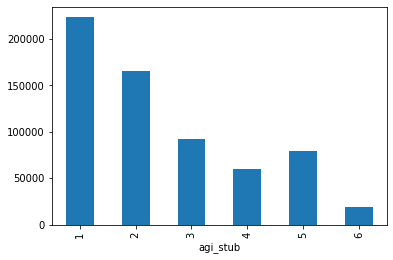

In [5]:
counts = tax_df.groupby("agi_stub").N1.sum()
counts.plot(kind="bar")


## PANDAS EXCEL

In [20]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel("dados/fcc-new-coder-survey.xlsx", "2017", skiprows=2)


# Saving xlsx formated
responses_2017.to_excel("dados/fcc-new-coder-survey-formated.xlsx", "2017")


# Showing
responses_2017.head()


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,ResourcePluralSight,ResourceSkillCrush,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,bachelor's degree,Information Technology,NaN


In [ ]:
# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

In [ ]:
## Append Two Excel files in one DataFrame
## All files with same structure
responses = pd.read_excel("...")

# Create an empty dataframe
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for sheet_name, df in responses.items():
    # Print the number of rows being added
    print("Adding {} rows".format(df.shape[0]))
    # Append df to all_responses, assign result
    all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()


## Banco de Dados

In [21]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///dados/data.db")
print(engine.table_names())


['boro_census', 'hpd311calls', 'weather']


C:\Users\danie\AppData\Local\Temp\ipykernel_20304\463593481.py:5: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [22]:
hpd_calls = pd.read_sql("hpd311calls", engine)
weather = pd.read_sql("weather", engine)


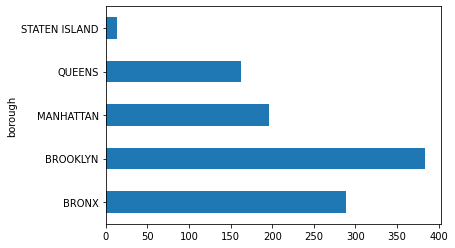

In [23]:
# Create query to get hpd311calls records about safety
query = """
SELECT *
FROM hpd311calls
WHERE complaint_type='SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)


# Graph the number of safety calls by borough
call_counts = safety_calls.groupby("borough").agency.count()
call_counts.plot.barh()
plt.show()


,complaint_type,COUNT(*)
0,APPLIANCE,1307
1,DOOR/WINDOW,4451
2,ELECTRIC,2777
3,ELEVATOR,106
4,FLOORING/STAIRS,2190


complaint_type    object
COUNT(*)           int64
dtype: object

<AxesSubplot:ylabel='complaint_type'>

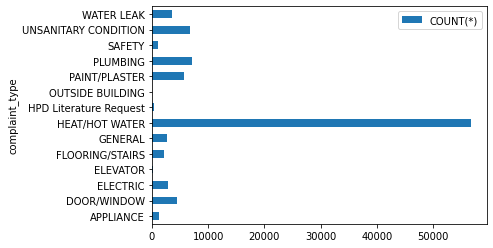

In [24]:
query = """
SELECT complaint_type, 
      COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

calls_by_issue = pd.read_sql(query, engine)

display(calls_by_issue.head())
display(calls_by_issue.dtypes)

calls_by_issue.plot(kind="barh", x="complaint_type")


In [25]:
# Create a query to get month, max tmax, and min tmin by month
query = """
SELECT month, 
	   MAX(tmax)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print("TEMPERATURA MAXIMA DE CADA MES")
display(weather_by_month)


TEMPERATURA MAXIMA DE CADA MES


,month,MAX(tmax)
0,December,61
1,February,78
2,January,61
3,March,62


In [26]:
# Create a query to get month, max tmax, and min tmin by month
query = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print("TEMPERATURA MAXIMA E MINIMA DE CADA MES")
display(weather_by_month)


TEMPERATURA MAXIMA E MINIMA DE CADA MES


,month,MAX(tmax),MIN(tmin)
0,December,61,9
1,February,78,16
2,January,61,5
3,March,62,27


In [27]:
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print("TEMPERATURA MAXIMA, MINIMA E TOTAL DE PRECIPITAÇÃO POR MES")
display(weather_by_month)


TEMPERATURA MAXIMA, MINIMA E TOTAL DE PRECIPITAÇÃO POR MES


,month,MAX(tmax),MIN(tmin),SUM(prcp)
0,December,61,9,2.21
1,February,78,16,5.83
2,January,61,5,2.18
3,March,62,27,5.17


In [28]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather 
  ON hpd311calls.created_date = weather.date;
"""

# Create dataframe of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the dataframe to make sure all columns were joined
calls_with_weather.head()


,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,station,name,...,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,USW00094728,"NY CITY CENTRAL PARK, NY US",...,-73.96925,42.7,01/01/2018,January,7.83,0.0,0.0,,19,7


In [29]:
# Query to get hpd311calls and precipitation values
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
leak_calls.head()


,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX,0.0
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN,0.0
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX,0.0
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN,0.0
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN,0.0


In [30]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
leak_calls.head()


,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough,prcp
0,38074305,01/01/2018,HPD,WATER LEAK,11212,1026 WILLMOHR STREET,17 BROOKLYN,BROOKLYN,0.0
1,38078748,01/01/2018,HPD,WATER LEAK,10458,2700 MARION AVENUE,07 BRONX,BRONX,0.0
2,38081097,01/01/2018,HPD,WATER LEAK,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN,0.0
3,38077874,01/01/2018,HPD,WATER LEAK,11418,129-11 JAMAICA AVENUE,09 QUEENS,QUEENS,0.0
4,38081110,01/01/2018,HPD,WATER LEAK,11420,111-17 133 STREET,10 QUEENS,QUEENS,0.0


In [31]:
# Query to get heat/hot water call counts by created_date
query = """
SELECT hpd311calls.created_date, 
       COUNT(*)
  FROM hpd311calls 
  WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
  GROUP BY hpd311calls.created_date;
"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
df.head()


,created_date,COUNT(*)
0,01/01/2018,4597
1,01/02/2018,4362
2,01/03/2018,3045
3,01/04/2018,3374
4,01/05/2018,4333


In [32]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	   COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
df.head()


,created_date,COUNT(*),tmax,tmin
0,01/01/2018,4597,19,7
1,01/02/2018,4362,26,13
2,01/03/2018,3045,30,16
3,01/04/2018,3374,29,19
4,01/05/2018,4333,19,9


## JSON

In [33]:
# Load pandas as pd
import pandas as pd

# Load the daily report to a dataframe
pop_in_shelters = pd.read_json("dados/dhs_daily_report.json")

# View summary stats about pop_in_shelters
pop_in_shelters.describe()


,adult_families_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,families_with_children_in_shelter,individuals_in_adult_families_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,total_individuals_in_shelter,total_single_adults_in_shelter
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2074.955000,16487.932000,23273.873000,11588.83500,4368.05400,8299.773000,3173.107000,32328.857000,23273.882000,39761.805000,55602.739000,11472.88000
std,148.020238,848.363772,926.243984,626.41371,299.05424,766.782607,353.227146,2150.583637,926.247187,1677.972788,2745.294235,1113.66412
min,1796.000000,14607.000000,21291.000000,10261.00000,3811.00000,6949.000000,2588.000000,28127.000000,21291.000000,35902.000000,49462.000000,9610.00000
25%,1906.000000,15831.500000,22666.000000,11060.00000,4026.00000,7590.500000,2790.000000,30184.250000,22666.000000,38775.500000,53196.500000,10381.75000
50%,2129.000000,16836.000000,23285.500000,11743.00000,4473.00000,8458.500000,3185.000000,33142.000000,23285.500000,40026.000000,56713.500000,11633.50000
75%,2172.250000,17118.250000,23610.000000,12146.00000,4567.00000,8883.250000,3538.000000,33940.750000,23610.000000,40529.500000,57872.250000,12437.50000
max,2356.000000,17733.000000,25490.000000,12413.00000,4944.00000,9599.000000,3779.000000,35294.000000,25490.000000,43208.000000,59068.000000,13270.00000


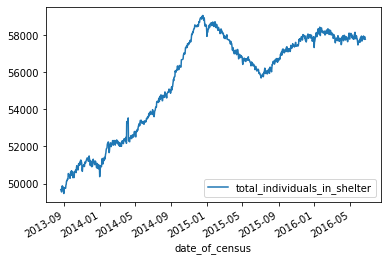

In [34]:
try:
    # Load the JSON with orient specified
    df = pd.read_json("dados/dhs_daily_report.json")

    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["date_of_census"])
    df.plot(x="date_of_census", y="total_individuals_in_shelter")
    plt.show()

except ValueError:
    print("pandas could not parse the JSON.")


In [83]:
import requests

url_api = "https://api.yelp.com/v3/businesses/search"

api_key = None


headers = {"Authorization": "Bearer {}".format(api_key)}

params = {"term": "cafe", "location": "NYC", "sort_by": "rating"}

response = requests.get(url_api, params=params, headers=headers)

data = response.json()

cafes = pd.DataFrame(data["businesses"])

cafes.head()[["categories", "name", "alias", "rating", "coordinates"]]


,categories,name,alias,rating,coordinates
0,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",Zaruma Gold Coffee,zaruma-gold-coffee-brooklyn,5.0,"{'latitude': 40.70208, 'longitude': -73.99018}"
1,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",Le Phin,le-phin-new-york-2,5.0,"{'latitude': 40.7286034766475, 'longitude': -7..."
2,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",Dreamers Coffee House,dreamers-coffee-house-new-york,5.0,"{'latitude': 40.712736, 'longitude': -73.995257}"
3,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",Kore Coffee,kore-coffee-new-york-6,5.0,"{'latitude': 40.71617, 'longitude': -73.9971}"
4,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",Sawada Coffee,sawada-coffee-new-york,5.0,"{'latitude': 40.71821831590835, 'longitude': -..."


In [100]:
from pandas.io.json import json_normalize

import requests

# DEFAUL LIMIT: 40

url_api = "https://api.yelp.com/v3/businesses/search"

api_key = None


headers = {"Authorization": "Bearer {}".format(api_key)}

params = {"term": "cafe", "location": "NYC", "sort_by": "rating", "limit": 50}

response = requests.get(url_api, params=params, headers=headers)

data = response.json()

# record_path -> pode ser usado para especifir o caminho
flat_cafes = json_normalize(
    data["businesses"],
    sep="_",
    record_path="categories",
    meta=[
        "name",
        "alias",
        "rating",
        ["coordinates", "latitude"],
        ["coordinates", "longitude"],
    ],
    meta_prefix="biz_",
)


print("shape: ", flat_cafes.shape)
flat_cafes.head()


shape:  (112, 7)


C:\Users\danie\AppData\Local\Temp\ipykernel_41396\806762916.py:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  flat_cafes = json_normalize(data["businesses"],


,alias,title,biz_name,biz_alias,biz_rating,biz_coordinates_latitude,biz_coordinates_longitude
0,coffee,Coffee & Tea,OXA House Coffee & Tea,oxa-house-coffee-and-tea-new-york-3,5.0,40.7103,-73.96513
1,tea,Tea Rooms,Paquita,paquita-new-york,5.0,40.733677,-74.005711
2,antiques,Antiques,Paquita,paquita-new-york,5.0,40.733677,-74.005711
3,coffee,Coffee & Tea,Paquita,paquita-new-york,5.0,40.733677,-74.005711
4,coffee,Coffee & Tea,A’MORE Caffe,a-more-caffe-new-york,5.0,40.722998,-73.985519


In [125]:
from pandas.io.json import json_normalize

import requests

import time

# DEFAUL LIMIT: 40

url_api = "https://api.yelp.com/v3/businesses/search"

api_key = None


headers = {"Authorization": "Bearer {}".format(api_key)}

# Mudando limit para 50 e pegando proximos 40 registros, e adicionando no flat_cafes, no final teremos 1(12 + 112 = 224) registros
params = {"term": "cafe", "location": "NYC", "sort_by": "rating", "limit": 50, "offset": 1}

response = requests.get(url_api, params=params, headers=headers)

data = response.json()["businesses"]

flat_cafes_top_50 = json_normalize(data)

params["offset"] = 50

response = requests.get(url_api, params=params, headers=headers)

data = response.json()["businesses"]

flat_cafes_next_50 = json_normalize(data)

flat_cafes = flat_cafes_top_50.append(flat_cafes_next_50, ignore_index=True)

flat_cafes.shape

C:\Users\danie\AppData\Local\Temp\ipykernel_41396\2038517856.py:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  flat_cafes_top_50 = json_normalize(data)
C:\Users\danie\AppData\Local\Temp\ipykernel_41396\2038517856.py:31: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  flat_cafes_next_50 = json_normalize(data)
C:\Users\danie\AppData\Local\Temp\ipykernel_41396\2038517856.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flat_cafes = flat_cafes_top_50.append(flat_cafes_next_50, ignore_index=True)


(100, 24)

In [127]:
flat_cafes.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,bJDU8KNLQMrZG0Ngs4AY0w,le-phin-new-york-2,Le Phin,https://s3-media3.fl.yelpcdn.com/bphoto/9ASzwJ...,False,https://www.yelp.com/biz/le-phin-new-york-2?ad...,61,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",5.0,[],...,40.728603,-73.983414,259 E 10th St,None,,New York,10009,US,NY,"[259 E 10th St, New York, NY 10009]"
1,56xmEk-5aTHwBiPyQTzMKA,dreamers-coffee-house-new-york,Dreamers Coffee House,https://s3-media3.fl.yelpcdn.com/bphoto/RG4YVh...,False,https://www.yelp.com/biz/dreamers-coffee-house...,56,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",5.0,"[delivery, pickup]",...,40.712736,-73.995257,54W Henry St,None,,New York,10002,US,NY,"[54W Henry St, New York, NY 10002]"
2,K6fkejf2ZBUdlsVrm5RbrA,kore-coffee-new-york-6,Kore Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/Nfc-Qc...,False,https://www.yelp.com/biz/kore-coffee-new-york-...,86,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",5.0,[],...,40.716170,-73.997100,26A Elizabeth St,None,,New York,10013,US,NY,"[26A Elizabeth St, New York, NY 10013]"
3,kpxXi23lUQkeJQH-2BtzDw,qahwah-house-brooklyn,Qahwah House,https://s3-media2.fl.yelpcdn.com/bphoto/c787G1...,False,https://www.yelp.com/biz/qahwah-house-brooklyn...,257,"[{'alias': 'mideastern', 'title': 'Middle East...",5.0,"[delivery, pickup]",...,40.718563,-73.957130,162 Bedford Ave,,None,Brooklyn,11249,US,NY,"[162 Bedford Ave, Brooklyn, NY 11249]"
4,U1exuSaIwTwpjxvlrKeftg,ppl-brooklyn,PPL,https://s3-media3.fl.yelpcdn.com/bphoto/Pyr46p...,False,https://www.yelp.com/biz/ppl-brooklyn?adjust_c...,27,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,[],...,40.712885,-73.958529,189 Roebling St,,None,Brooklyn,11211,US,NY,"[189 Roebling St, Brooklyn, NY 11211]"
